# Regression

### This project focuses on predicting car prices using regression models based on various vehicle attributes. The workflow includes data preprocessing, exploratory data analysis (EDA), feature selection, model training, and evaluation.

In [1]:
# Import Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("cars.xls")

## EDA

### Data Preprocessing & EDA

- The dataset was explored for missing values, correlations, and feature importance.
- Initial features used: `Mileage`, `Cylinder`, `Liter`, and `Cruise`.

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.shape

(804, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [8]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [9]:
df['Make'].value_counts(normalize=True)

Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: Make, dtype: float64

In [10]:
import seaborn as sns

<Axes: xlabel='Make', ylabel='count'>

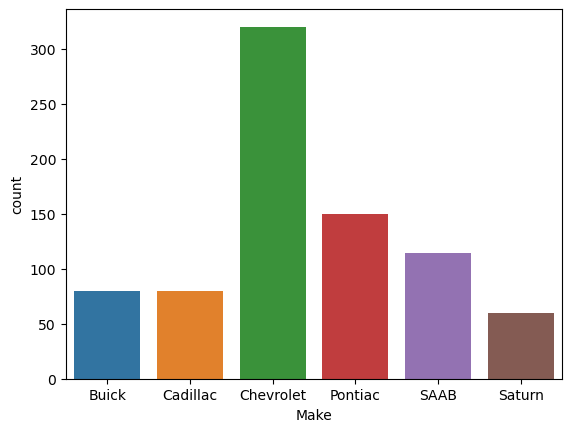

In [11]:
sns.countplot(x=df['Make'])

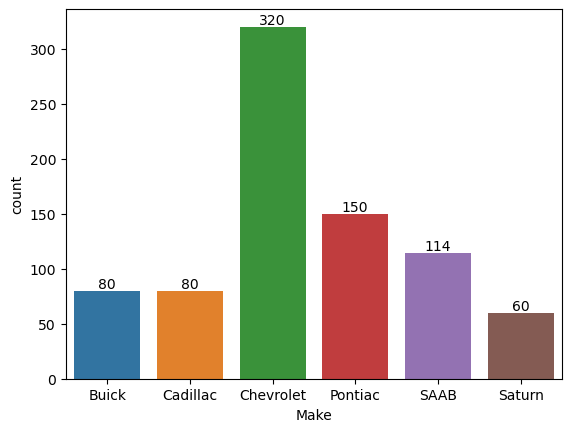

In [12]:
ax=sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0]);

<Axes: >

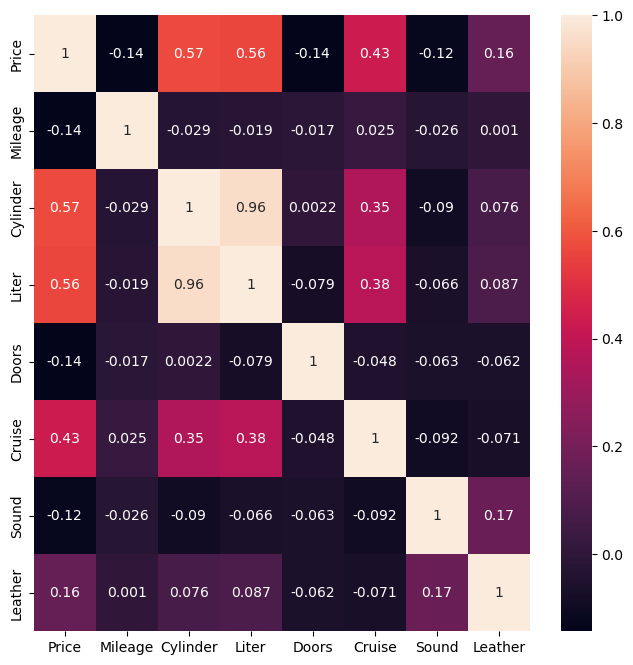

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
abs(df.corr()["Price"]).sort_values(ascending=True)

Sound       0.124348
Doors       0.138750
Mileage     0.143051
Leather     0.157197
Cruise      0.430851
Liter       0.558146
Cylinder    0.569086
Price       1.000000
Name: Price, dtype: float64

In [15]:
# Rule of Thumb - Take the columns correlation above 0.2 and below 0.9

In [16]:
df['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

<Axes: xlabel='count', ylabel='Doors'>

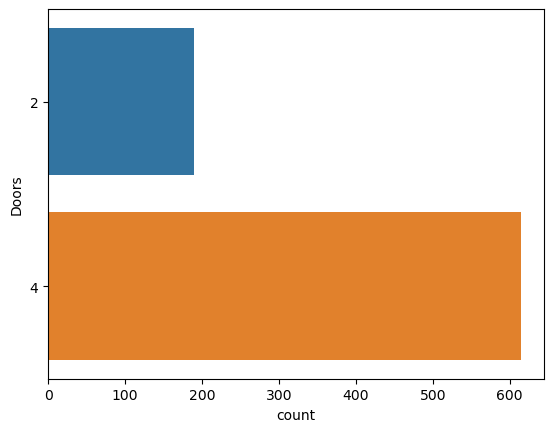

In [17]:
sns.countplot(y=df["Doors"])

In [18]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

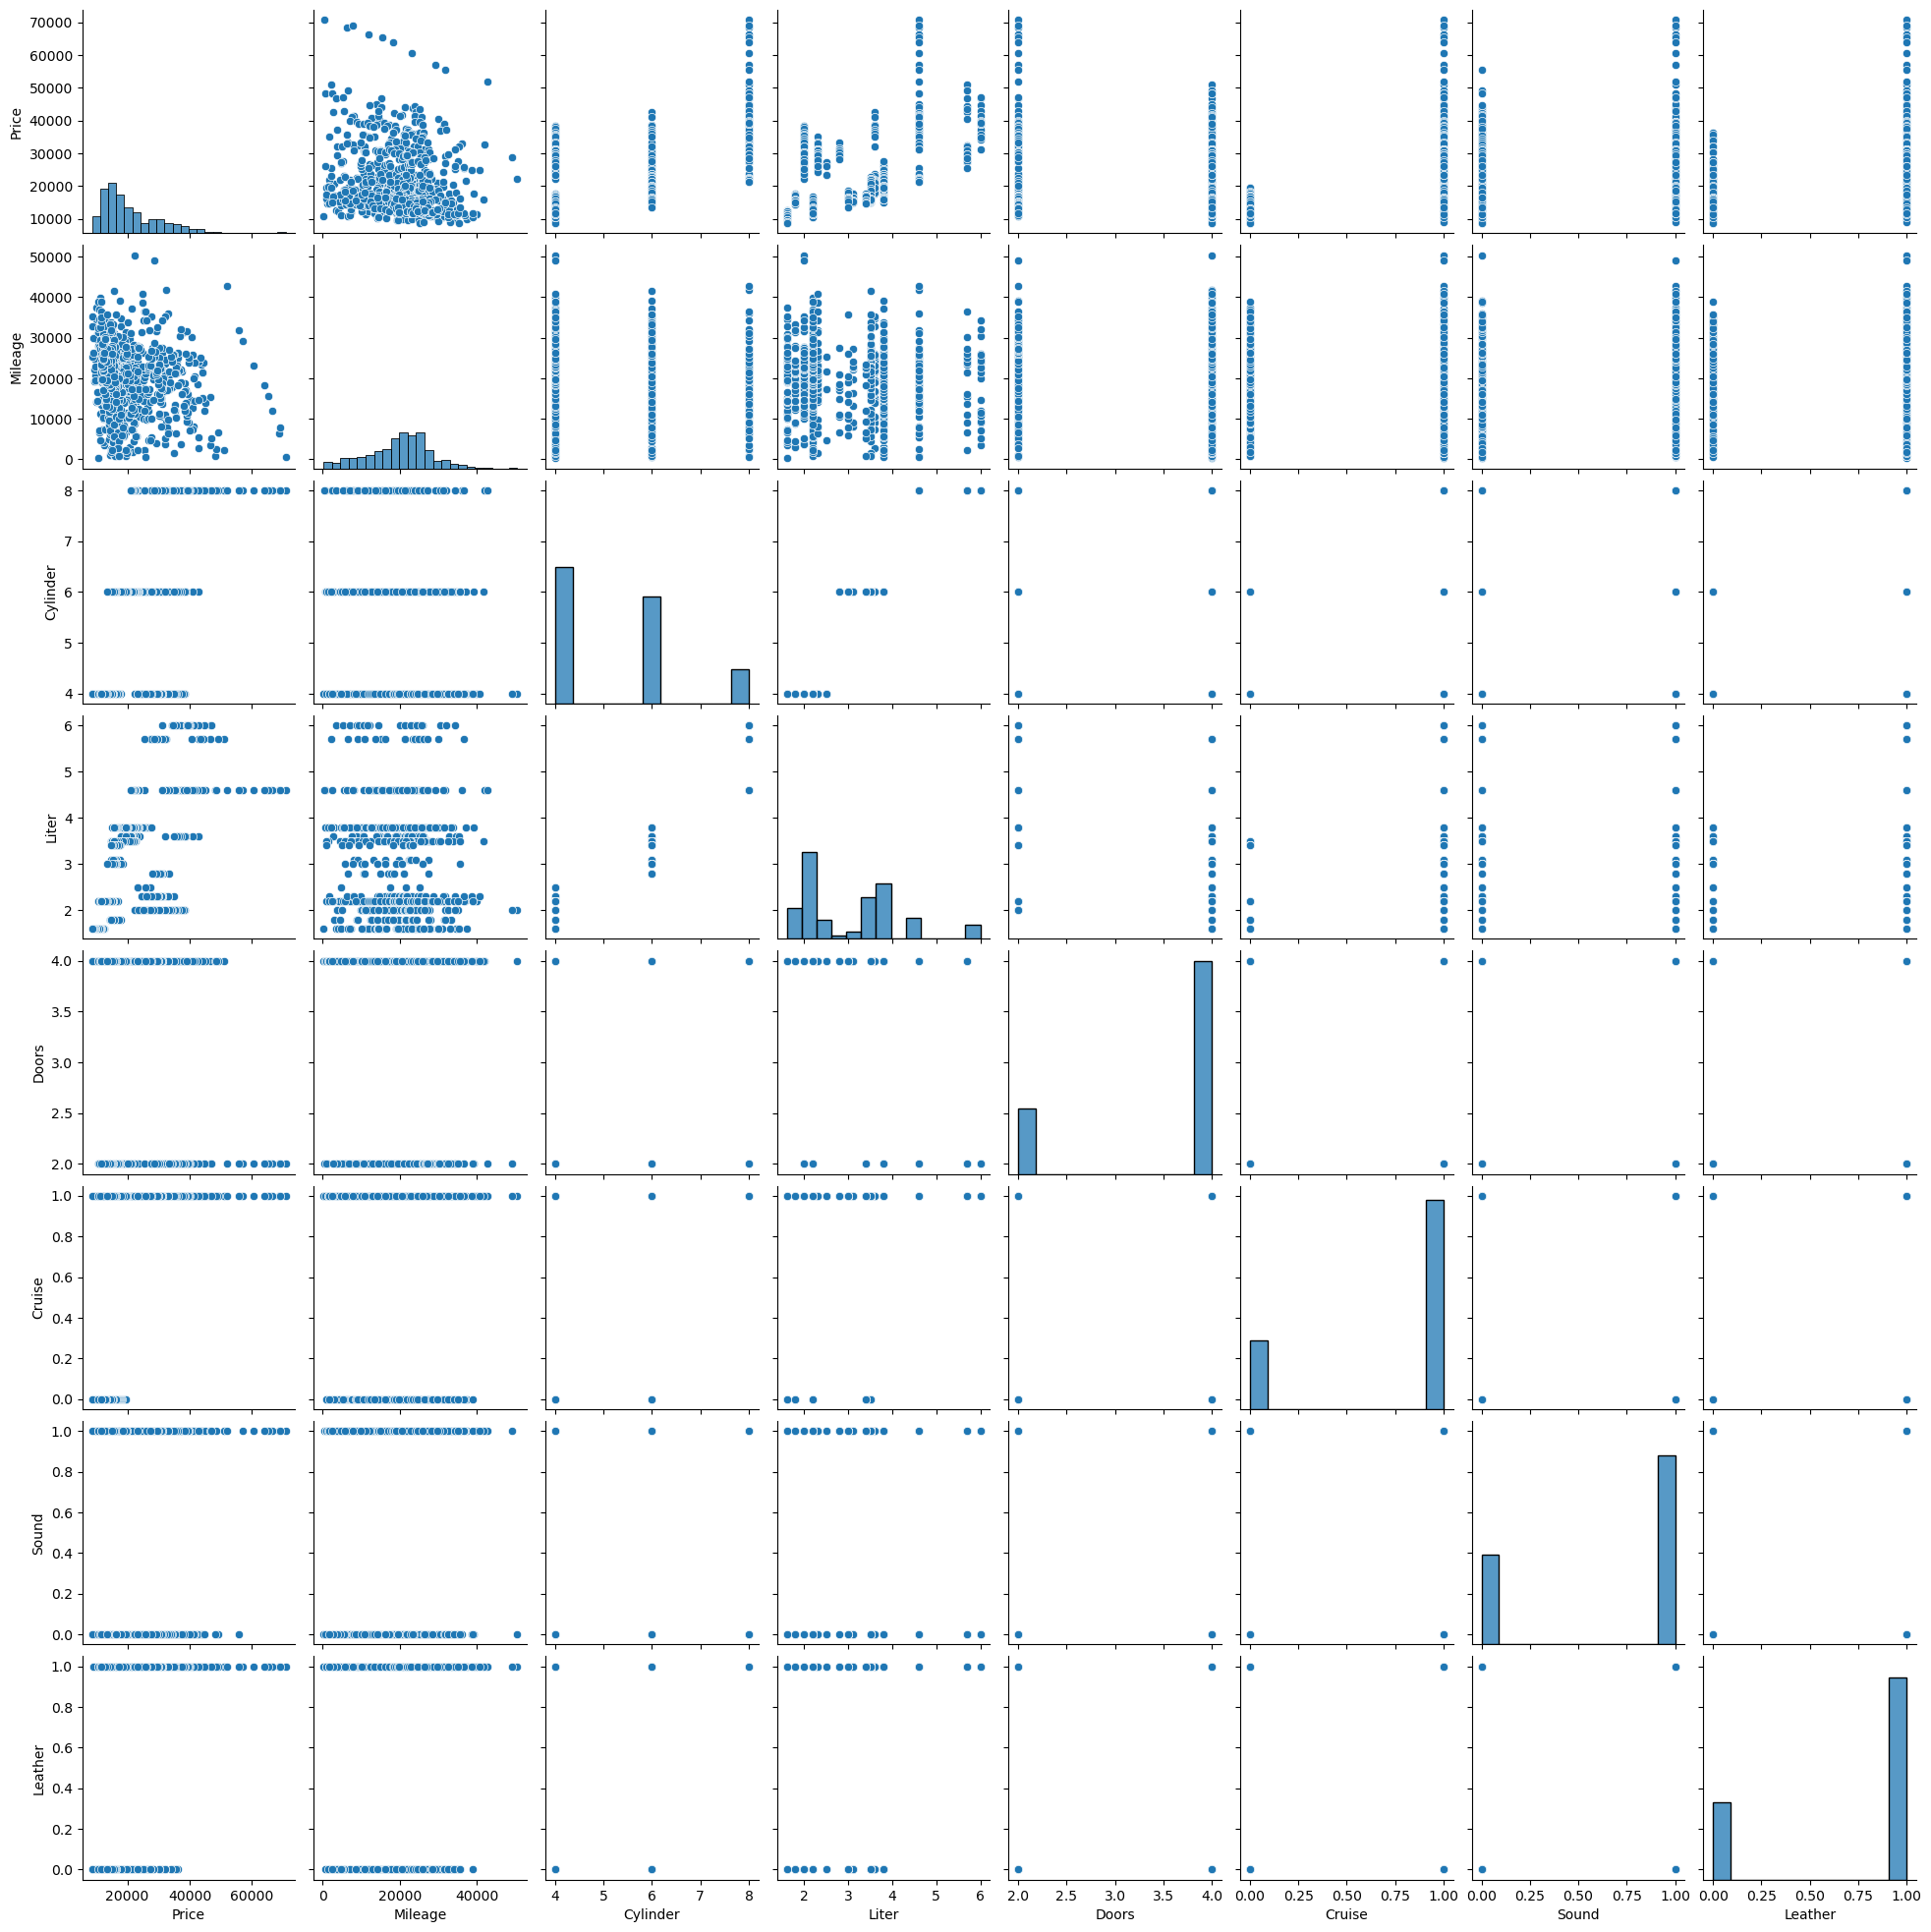

In [19]:
sns.pairplot(df)

# Modelling

In [20]:
x=df[["Mileage","Cylinder","Liter","Cruise"]] # attribute, properties,predictors, Descriptors
y=df["Price"] # Target Varible

In [21]:
# Rule of thumb never show test data to the model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.shape

(643, 4)

In [25]:
x_test.shape

(161, 4)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
model=lr.fit(x_train,y_train)

In [29]:
pred=model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [31]:
r2_score(pred,y_test)

-0.3671260571211772

In [32]:
x=df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']]
y=df['Price']

In [33]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [34]:
x=pd.get_dummies(x,drop_first=True)

In [35]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
model=lr.fit(x_train,y_train)

In [38]:
pred=model.predict(x_test)

In [39]:
r2_score(pred,y_test)

0.9717252793475157

In [40]:
(mean_squared_error(pred,y_test))**0.5

1523.6314728711316

In [41]:
mean_absolute_error(pred,y_test)

1091.6117541195379

In [42]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [43]:
R=Ridge()
L=Lasso()
EN=ElasticNet()


In [44]:
R.fit(x_train,y_train)
L.fit(x_train,y_train)
EN.fit(x_train,y_train)

ElasticNet()

In [45]:
predr=R.predict(x_test)
predl=L.predict(x_test)
preden=EN.predict(x_test)

In [46]:
r2_score(predr,y_test)

0.9684687553754919

In [47]:
r2_score(predl,y_test)

0.9712425418609401

In [48]:
r2_score(preden,y_test)

-0.21210080624465233

### Modeling & Performance

- A Linear Regression model was trained using Scikit-learn.
- The initial R² score was `-0.167`, indicating poor predictive performance.

### Feature Engineering & Improvement

- Additional categorical variables (`Make` and `Trim`) were introduced using one-hot encoding.
- After retraining, the R² score improved to `0.97`, showing strong predictive power.

### Evaluation Metrics

- **Root Mean Squared Error (RMSE):** ~39  
- **Mean Absolute Error (MAE):** ~1891

### Regularization Models

- Ridge and Lasso regression models performed similarly to linear regression (`R² ~ 0.96–0.97`).
- ElasticNet performed poorly (`R² ~ -0.21`), likely due to inappropriate hyperparameters.

### Conclusion

- The inclusion of categorical variables significantly improved model performance.
- Regularization (Ridge/Lasso) helped prevent overfitting, while ElasticNet was not effective.
- The final model provides highly accurate car price predictions, making it a useful tool for price estimation in the automotive market.
